# Thông tin
1. MSSV: 20520465
2. Họ tên: Nguyễn Vũ Dương
3. Bài tập: 6
4. Ngày thực hiện: 28/03/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
#Hàm tính histogram
def TinhHist(pathfilename):
  img = cv2.imread(pathfilename, 0)
  hist = cv2.calcHist([img], [0], None, [256], [0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist / size
  return hist

In [ ]:
#hiển thị histogram
def HienThiHist(hist):
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.title('Histogram')
  plt.show()

In [ ]:
def show2image(img_src, img_rst, title1, title2):
    plt.figure(figsize=(10, 10))

    plt.subplot(1,2,1)
    plt.title(title1)
    img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
    plt.imshow(img_src, interpolation='bicubic')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    img_rst = cv2.cvtColor(img_rst.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img_rst, interpolation='bicubic')

In [ ]:
def globalThresholding(img, thres=127):
  img_rst = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img_rst[i][j] < thres:
        img_rst[i][j] = 255
      else:
        img_rst[i][j] = 0
  return img_rst

In [ ]:
def Exercise_1_global(path_file,thres =  None):
  img = cv2.imread(path_file,0)
  hist_img = TinhHist(path_file)
  HienThiHist(hist_img)
  print( )
  if thres is None:
    img_result =  globalThresholding(img)
  else:
    img_result =  globalThresholding(img,thres)
  show2image(img,img_result,'Source','Result')

In [ ]:
path = '/content/drive/MyDrive/CS231.M21.KHCL/Baitap/Baitap6/images/'

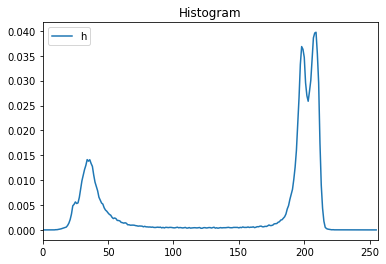

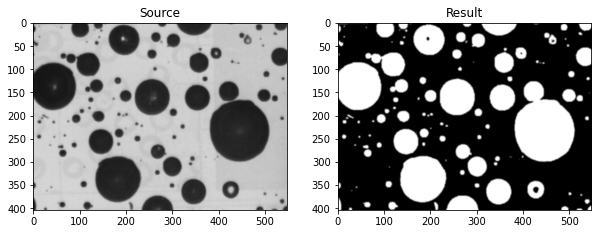

In [ ]:
Exercise_1_global(path+'particles.bmp',150)

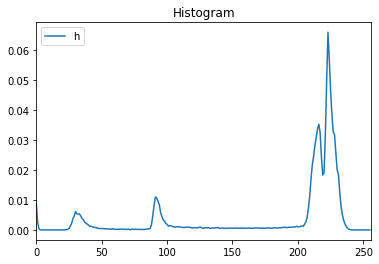

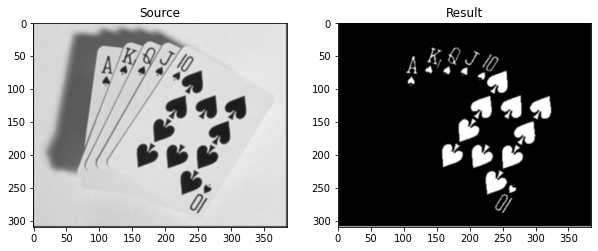

In [ ]:
Exercise_1_global(path+'Phandoan01.jpg',80)

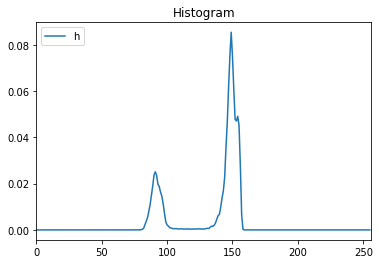

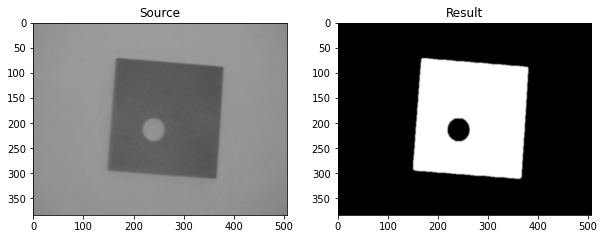

In [ ]:
Exercise_1_global(path+'wdg2.jpg',120)

In [ ]:
def adaptiveThresholding(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      #cv2_imshow(x)
      #drawHist(x)
      t = np.average(x)
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x,t)
  return g

In [ ]:
def Exercise_1_adaptive(path_file,nrow,ncol):
  img = cv2.imread(path_file,0)
  img_adaptive = adaptiveThresholding(img,nrow,ncol)
  show2image(img,img_adaptive,'source','adaptive')

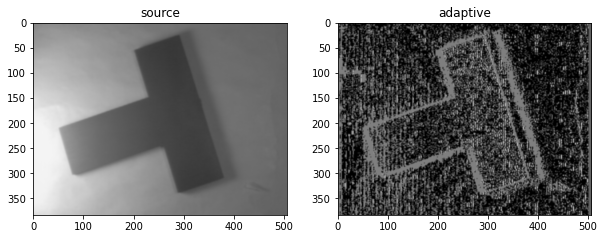

In [ ]:
Exercise_1_adaptive(path+'wdg3.jpg',384,250)

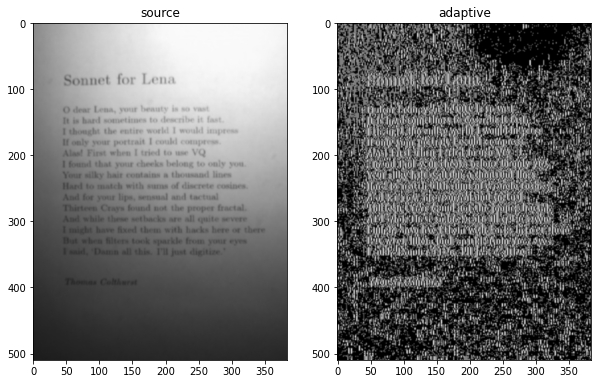

In [ ]:
Exercise_1_adaptive(path+'son1.jpg',510,192)

#Representing each pixel as (r,g,b)

In [ ]:
from matplotlib.image import imread

In [ ]:
def find_k_cluster(img,max_k=6):
  #Sử dụng elbow để xác định dc nên chia bao nhiêu cụm
  k_clusters = list(range(1,max_k))
  sse = []

  for k in k_clusters:
    km = KMeans(n_clusters=k)
    km.fit(img)
    sse.append(km.inertia_)

  plt.figure(figsize=(10,10))
  plt.plot(k_clusters, sse, '-o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Sum of Suqared Error')
  plt.show()

In [ ]:
def read_file(path_file):
  new_image = imread(path_file)
  new_image = new_image/255.0
  shape_img = new_image.shape
  X = new_image.reshape(-1,3)
  return X,shape_img

In [ ]:
def image_clustering_kmean(img,shape_img,k):
  km = KMeans(n_clusters=k)
  km.fit(img)
  #img_seg = km.cluster_centers_
  img_seg = np.random.rand(k,3)
  img_seg = img_seg[km.labels_]
  img_seg = img_seg.reshape(shape_img)
  return img_seg

In [ ]:
def show2image_using_plt(img_src, img_rst, title1, title2):
    plt.figure(figsize=(10, 10))

    plt.subplot(1,2,1)
    plt.title(title1)
    plt.imshow(img_src)

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(img_rst)

In [ ]:
img_vege,shape_vege = read_file(path+'vegetables.jpg')

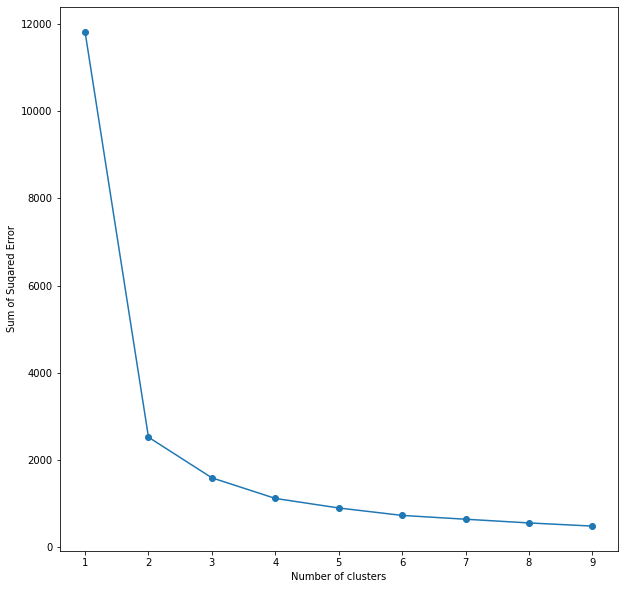

In [ ]:
find_k_cluster(img_vege,max_k = 10)

In [ ]:
img_veg_seg=image_clustering_kmean(img_vege,shape_vege,6)

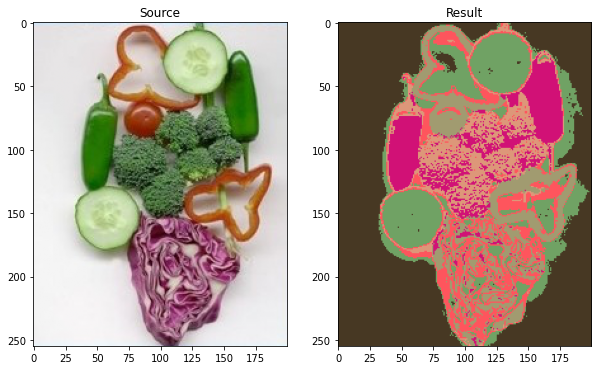

In [ ]:
show2image_using_plt(img_vege.reshape(shape_vege),img_veg_seg,'Source','Result')

In [ ]:
img_hand,shape_hand = read_file(path+'hand.jpg')

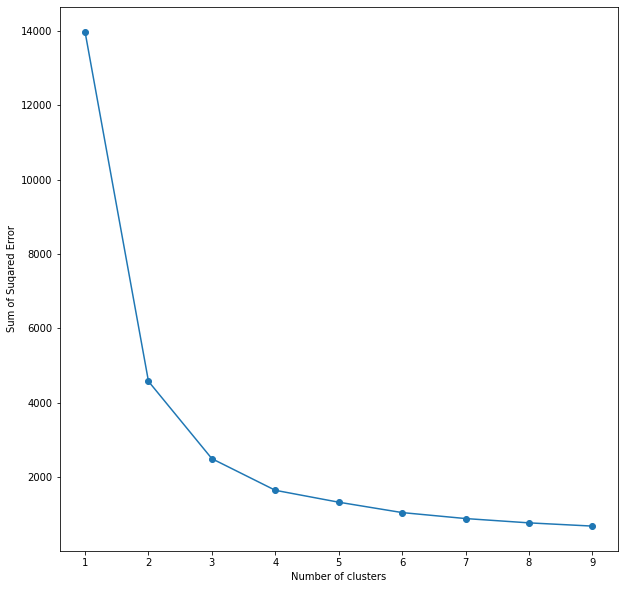

In [ ]:
find_k_cluster(img_hand,max_k = 10)

In [ ]:
img_hand_seg=image_clustering_kmean(img_hand,shape_hand,10)

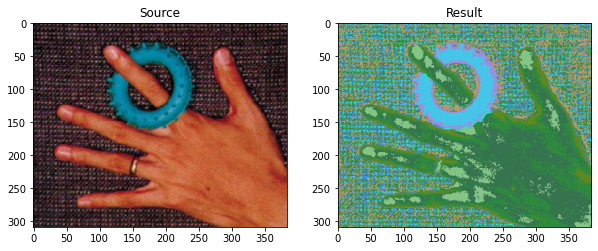

In [ ]:
show2image_using_plt(img_hand.reshape(shape_hand),img_hand_seg,'Source','Result')

In [ ]:
img_thuoc,shape_thuoc = read_file(path+'thuoc.jpg')

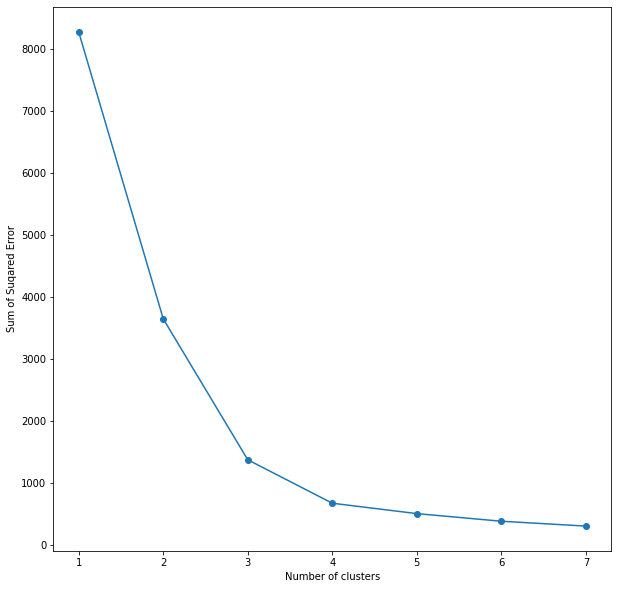

In [ ]:
find_k_cluster(img_thuoc,max_k = 8)

In [ ]:
img_thuoc_seg=image_clustering_kmean(img_thuoc,shape_thuoc,8)

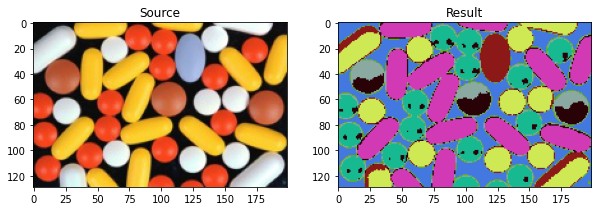

In [ ]:
show2image_using_plt(img_thuoc.reshape(shape_thuoc),img_thuoc_seg,'Source','Result')

#Represent each pixel as (r,g,b,x,y)

In [ ]:
!pip install fuzzy-c-means

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
from fcmeans import FCM

In [ ]:
def Segmentation(img, k, RGBXY=True,option=1):
  nrow, ncol,nchl = img.shape
  g = []
  if RGBXY == False:
    g = img.reshape(nrow*ncol,nchl)
  else:
    for i in range(nrow):
      for j in range(ncol):
        temp = [img[i][j][0], img[i][j][1], img[i][j][2], i, j]
        g.append(temp)
  if option == 1:
    k_means = KMeans(n_clusters = k, random_state = 0).fit(g)
    #tt = k_means.cluster_centers_[k_means.labels_]
    arrcolor = np.random.rand(k,3) * 255
    tt = arrcolor[k_means.labels_]
  if option == 2:
    bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(g)
    arrcolor = np.random.rand(k,3) * 255
    tt = arrcolor[ms.labels_]
    #tt = ms.cluster_centers_[ms.labels_]

  if option == 3:
    fcm = FCM(n_clusters=k)
    fcm.fit(np.array(g))
    fcm_labels = fcm.predict(np.array(g))
    tt = fcm.centers[fcm_labels]
    #arrcolor = np.random.rand(k,3) * 255
    #tt = arrcolor[fcm_labels]
  t = tt[:,0:3]
  img_res = t.reshape(nrow, ncol, nchl)
  return img_res

In [ ]:
def read_file_rgbxy(path_file):
  new_image = cv2.imread(path_file)
  #new_image = new_image/255.0
  return new_image

In [ ]:
img_vegetable = read_file_rgbxy(path+'vegetables.jpg')

In [ ]:
img_vegetable_seg = Segmentation(img_vegetable,6,True,1)

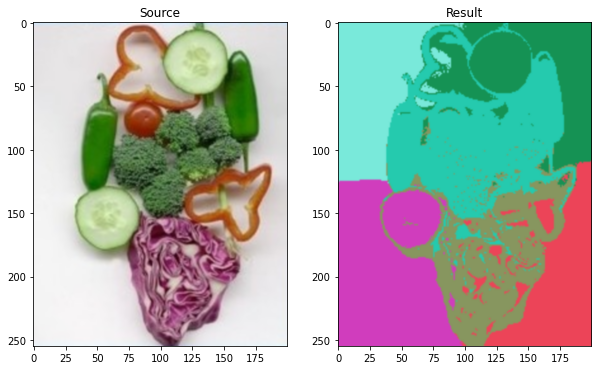

In [ ]:
show2image(img_vegetable,img_vegetable_seg,'Source','Result')

In [ ]:
img_thuoc = read_file_rgbxy(path+'thuoc.jpg')

In [ ]:
img_thuoc_seg = Segmentation(img_thuoc,8,True,1)

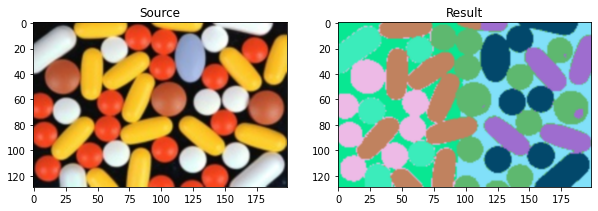

In [ ]:
show2image(img_thuoc,img_thuoc_seg,'Source','Result')

#FCM MeanShift

In [ ]:
img_thuoc_FCM = read_file_rgbxy(path+'thuoc.jpg')

In [ ]:
img_thuoc_FCM_seg = Segmentation(img_thuoc_FCM,8,True,3)

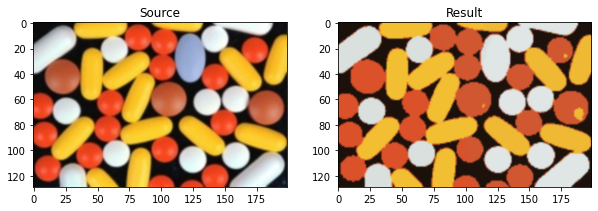

In [ ]:
show2image(img_thuoc_FCM,img_thuoc_FCM_seg,'Source','Result')

In [ ]:
img_vegetable_meanshift = read_file_rgbxy(path+'vegetables.jpg')

In [ ]:
img_vegetable_meanshift_seg = Segmentation(img_vegetable_meanshift,6,True,2)

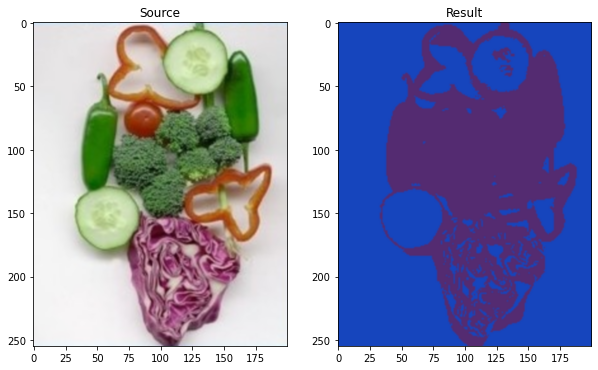

In [ ]:
show2image(img_vegetable_meanshift,img_vegetable_meanshift_seg,'Source','Result')

#GraphCut

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def GraphSeg(path, x, y, w, h):
  img = cv2.imread(path)
  #print(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_ = img.copy()
  cv2.rectangle(img_, (x,y), (x+w, y+h), (255,0,0), 2)
  plt.figure(figsize=(10,10))
  plt.subplot(1, 2, 1)
  plt.imshow(img_)
  print(img_.shape)

  mask = np.zeros(img.shape[:2], np.uint8)
  backgroundModel = np.zeros((1, 65), np.float64)
  foregroundModel = np.zeros((1, 65), np.float64)
  rectangle = (x, y, w, h)
  cv2.grabCut(img, mask, rectangle,
              backgroundModel, foregroundModel,
              5, cv2.GC_INIT_WITH_RECT)

  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  res = img * mask2[:, :, np.newaxis]
  plt.subplot(1, 2, 2)
  plt.imshow(res)
  res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

In [ ]:
def GraphSeg1(img, x, y, w, h):
  #img = cv2.imread(path)
  #print(img)
  img = np.array(img, dtype=np.uint8)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_ = img.copy()
  cv2.rectangle(img_, (x,y), (x+w, y+h), (255,0,0), 2)
  plt.figure(figsize=(10,10))
  plt.subplot(1, 2, 1)
  plt.imshow(img_)
  print(img_.shape)

  mask = np.zeros(img.shape[:2], np.uint8)
  backgroundModel = np.zeros((1, 65), np.float64)
  foregroundModel = np.zeros((1, 65), np.float64)
  rectangle = (x, y, w, h)
  cv2.grabCut(img, mask, rectangle,
              backgroundModel, foregroundModel,
              5, cv2.GC_INIT_WITH_RECT)

  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  res = img * mask2[:, :, np.newaxis]
  plt.subplot(1, 2, 2)
  plt.imshow(res)
  res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

(427, 640, 3)


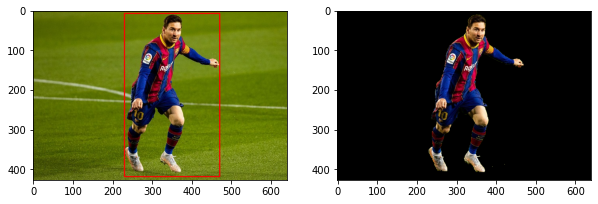

In [ ]:
GraphSeg(path+'Lionel-Messi.jpg', 230, 8, 240, 410)

(184, 234, 3)


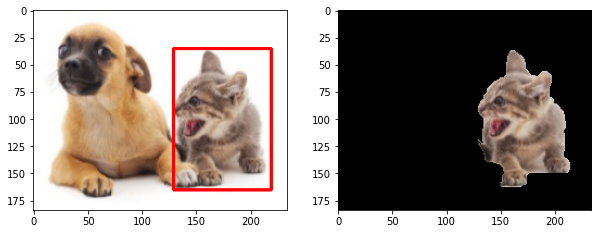

In [ ]:
GraphSeg(path+'dogcat.jpg', 129, 35, 90 , 130)

(274, 353, 3)


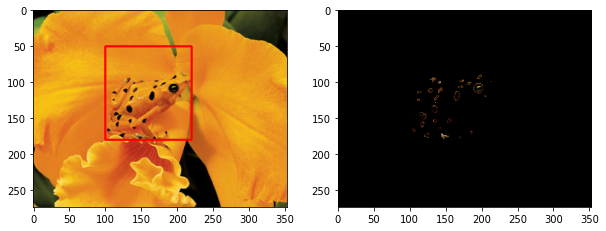

In [ ]:
GraphSeg(path+'camourflage_00097.jpg', 100, 50, 120 , 130)

In [ ]:
img_check = read_file_rgbxy(path+'camourflage_00129.jpg')

In [ ]:
img_check_meanshift_seg = Segmentation(img_check,30,True,3)

In [ ]:
show2image(img_check,img_check_meanshift_seg,'Source','Result')

(243, 400, 3)


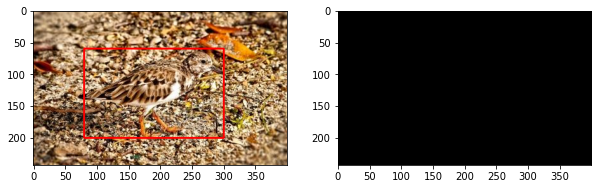

In [ ]:
GraphSeg(path+'camourflage_00129.jpg', 80, 60, 220, 140)

(243, 400, 3)


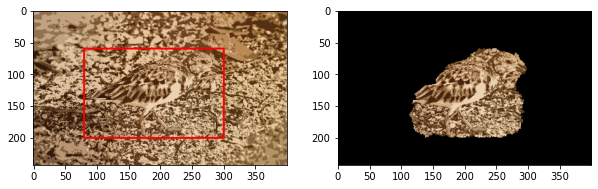

In [ ]:
GraphSeg1(img_check_meanshift_seg, 80, 60, 220, 140)